### Mega Case Study - Make a hybrid depp learning model

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv('../../../Data/DL_Tutorial/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [10]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

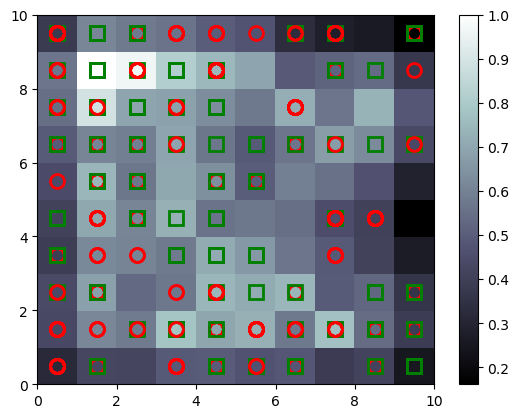

In [11]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

In [17]:
mappings = som.win_map(X)

# 대상 좌표들
coords = [(5, 3), (8, 3)]

fraud_candidates = []
frauds = None

for coord in coords:
    mapped = mappings.get(coord, [])
    # 데이터가 존재하고 feature 수가 0보다 큰 경우만 추가
    if len(mapped) > 0 and np.array(mapped).shape[1] > 0:
        fraud_candidates.append(np.array(mapped))

# 결합
if fraud_candidates:
    frauds = np.concatenate(fraud_candidates, axis=0)
    frauds = sc.inverse_transform(frauds)
    print("🙌 이상 거래 데이터 shape:", frauds.shape)
else:
    print("⚠️ 선택한 SOM 노드에 해당하는 데이터가 없습니다.")


🙌 이상 거래 데이터 shape: (2, 15)


### Creating the matrix of features

In [18]:
customers = dataset.iloc[:, 1:].values


### Creating the dependent variable

In [19]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [21]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential([
    Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15),
    Dense(units=1, kernel_initializer='uniform', activation='sigmoid'),
])

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(customers, is_fraud, batch_size=1, epochs=2, verbose = 2)

/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-28 14:53:07.687777: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-28 14:53:07.687812: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-03-28 14:53:07.687817: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-03-28 14:53:07.687846: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-28 14:53:07.687855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Crea

Epoch 1/2


2025-03-28 14:53:08.051595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


690/690 - 4s - 5ms/step - accuracy: 0.9884 - loss: 0.4985
Epoch 2/2
690/690 - 3s - 4ms/step - accuracy: 0.9841 - loss: 0.1988


In [23]:
y_pred = classifier.predict(customers)
y_pred

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.06873284],
       [0.05879673],
       [0.09397279],
       [0.05331298],
       [0.04926878],
       [0.05985308],
       [0.04780049],
       [0.08191283],
       [0.08481494],
       [0.11230937],
       [0.11560167],
       [0.1256527 ],
       [0.08162914],
       [0.11652923],
       [0.10907415],
       [0.06367242],
       [0.12347937],
       [0.05117824],
       [0.06179666],
       [0.08117089],
       [0.07187011],
       [0.08752028],
       [0.06060719],
       [0.06700185],
       [0.05318058],
       [0.09671605],
       [0.06650847],
       [0.27925256],
       [0.06333383],
       [0.07034963],
       [0.10177602],
       [0.08209445],
       [0.19591656],
       [0.0749303 ],
       [0.19692808],
       [0.05002477],
       [0.2396313 ],
       [0.10471354],
       [0.1161594 ],
       [0.2798885 ],
       [0.06107226],
       [0.07677217],
       [0.10148629],
       [0.08405142],
       [0.05724496],
       [0.05983785],
       [0.06916159],
       [0.050

In [24]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1 )
y_pred

array([[1.57761560e+07, 6.87328354e-02],
       [1.57395480e+07, 5.87967262e-02],
       [1.56628540e+07, 9.39727947e-02],
       ...,
       [1.56754500e+07, 5.44242933e-02],
       [1.57764940e+07, 6.88913018e-02],
       [1.55924120e+07, 2.54671872e-01]])

In [26]:
y_pred = y_pred[y_pred[:, 1].argsort()]
y_pred

array([[1.56993400e+07, 1.53508391e-02],
       [1.57785890e+07, 1.55370664e-02],
       [1.57574340e+07, 1.61869470e-02],
       ...,
       [1.57627160e+07, 8.40373397e-01],
       [1.55988020e+07, 8.61741841e-01],
       [1.57901130e+07, 9.66165900e-01]])